<a href="https://colab.research.google.com/github/niteshgajakosh/Airbnb_Bookings_Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**Exploratory Data Analysis on NYC Airbnb 2019 dataset**

Airbnb was conceived years ago by two roommates who rented out an air mattress in their living room. This turned their whole apartment into a bed and breakfast. This was done to sustain the high-priced living in San Francisco. This gave the company its name Airbedandbreakfast.This San-Francisco based start-up offers you someone’s home as a place to stay instead of a hotel. Airbnb was started in 2008.Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one-of-a-kind services that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

download.png

# **Acquiring and Loading Data**

In [1]:
#importing necessery libraries for future analysis of the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#using pandas library and 'read_csv' function to read Airbnb NYC 2019 csv file

df_airbnb = pd.read_csv('/content/drive/MyDrive/Datasets/Airbnb NYC 2019.csv')
df_airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# **Data** **Exploration**

In [4]:
#checking info about dataset
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df_airbnb.shape

(48895, 16)

This dataset has around **48895 observations** in it with **16 columns(features)** and it is a mix between categorical and numeric values.

**Variable Identification and Understading Data**

Finding numerical and categorical variables

In [6]:
#checking what are the variables here:
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

By observations we get to that **'name'** column represents **property name** and particular properties were hosted by **particular hosts** who are represented in **'host_name'** column. But a particular **host_name** can have multiple properties in an area. So, host_name is like one of the **categorical variables** like **neighbourhood(areas), neighbourhood_group, and room_type**.

In [7]:
#let's proceed with examing some categorical unique values

#examining the unique values of neighbourhood_group 
df_airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
#examining the unique values of neighbourhood
df_airbnb['neighbourhood'].nunique()

221

In [9]:
#examining the unique values of room_type 
df_airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [10]:
df_airbnb['host_id'].nunique()

37457

In [11]:
df_airbnb['host_name'].nunique()

11452

In [12]:
df_airbnb['name'].nunique()

47905

In [13]:
#  to find numerical veriables(overall summary)
df_airbnb.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

**id, host_Id,latitude, longitude, price, minimum_nights, number_of_reviews,last_review, reviews_per_month,calculated_host_listings_count, availability_365** are numerical variables

**Handling NaN Values**

In [14]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

So far we get to know that columns such as **'id' , 'last_review'** are of no use for this particular analysis. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month.

In [15]:
#dropping columns that are not significant
df_airbnb.drop(['id','last_review'], axis=1, inplace=True)

In [16]:
#replacing all NaN values in 'reviews_per_month' with 0

df_airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df_airbnb.reviews_per_month.isnull().sum()

0

Also, **host_names** and names are not that important in our analysis, so atleast we are good to fill those with some substitutes in both the columns

In [17]:
#filling these missing values in both with unknown & no_name respectively!

df_airbnb['name'].fillna('unknown',inplace=True)
df_airbnb['host_name'].fillna('no_name',inplace=True)

In [18]:
#examing changes
df_airbnb.name.isnull().sum()

0

In [19]:
#examing changes
df_airbnb.host_name.isnull().sum()

0

In [20]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

# **Exploring and Visualizing Data**

if a person trying to book a listing for stay/rent he/she will look into these following factors while booking: **neighbourhood_group, neighbourhood,room_type, price, number_of_reviews and availability** these are the important ones in our analysis.

Let's check the correlation matrix to understand how are the features corelated with each other. Also to get an idea which are the most important features in this data.

In [21]:
#correlation matrix
plt.figure(figsize=(15,8))
plt.rcParams['font.size'] =12
corrmat = df_airbnb.corr()
sns.heatmap(corrmat, vmin = 0.0 ,vmax=1.0, square=True , annot= True, cmap='Spectral');

From the heatmap we can see

the correlation between different features
There's correlation among **host_id** to **reveiws_per_month & availability_365**. Also, there's correlation between **min_nights to calculated_host_listings_count & availability_365**. **Price also shows some correlation with availability_365 & calculated_host_listings_count**.

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variables. Also, **no_of_reviews column is correlated to availability_365**

# **Single Variable Analysis**

**1.top 10 hosts (IDs) have the most listings**

In [22]:
#top 10 hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service

top_host = df_airbnb.host_id.value_counts().head(10)
top_host.reset_index()

df_top_host = pd.DataFrame(top_host)
df_top_host.reset_index(inplace=True)
df_top_host.rename(columns={'index':'host_id','host_id':'count'},inplace=True)
df_top_host

host_id  count
0  219517861    327
1  107434423    232
2   30283594    121
3  137358866    103
4   16098958     96
5   12243051     96
6   61391963     91
7   22541573     87
8  200380610     65
9    7503643     52

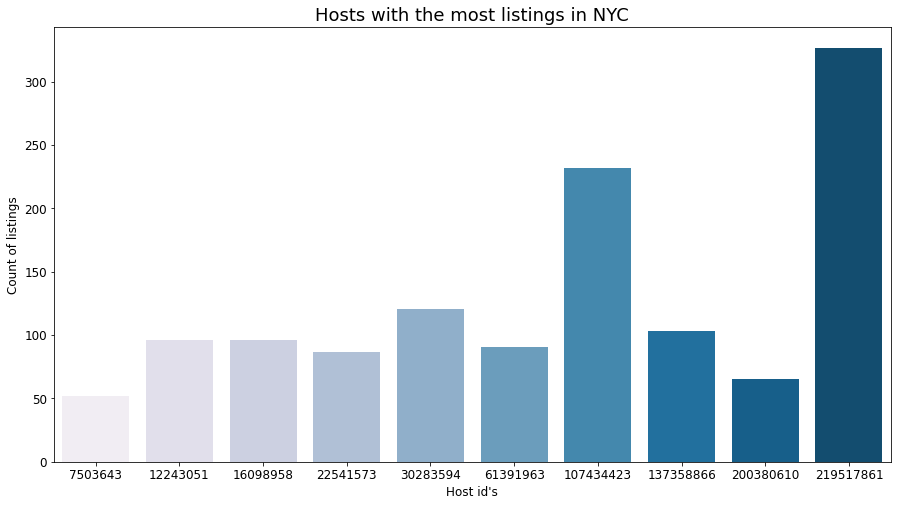

In [23]:
plt.figure(figsize=(15,8))
viz=sns.barplot(x='host_id', y='count', data=df_top_host, palette="PuBu")
viz.set_title('Hosts with the most listings in NYC', size=18)
viz.set_ylabel('Count of listings')
viz.set_xlabel('Host id\'s')
viz.set_xticklabels(viz.get_xticklabels())
plt.show()

**2.the neighbourhood group vs no of listings in entire NYC**

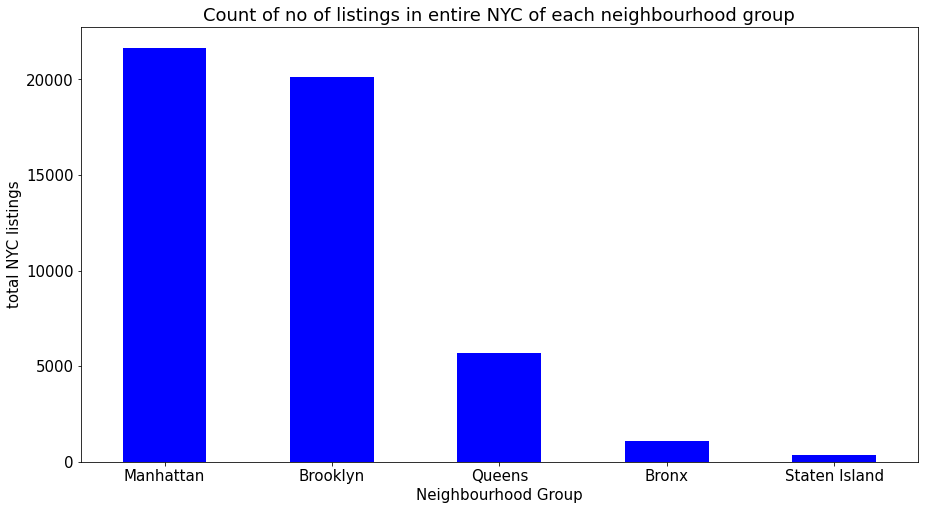

In [24]:
plt.figure(figsize=(15,8))
plt.rcParams['font.size'] =15
df_airbnb['neighbourhood_group'].value_counts().plot(kind='bar',color='b', rot = 0)
plt.xlabel('Neighbourhood Group')
plt.ylabel('total NYC listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group')
plt.show()

The neighbourhood group 'Manhattan' has the highest no of listings in entire NYC

**3.Top 10 neighbourhoods in entire NYC on the basis of count of listings**

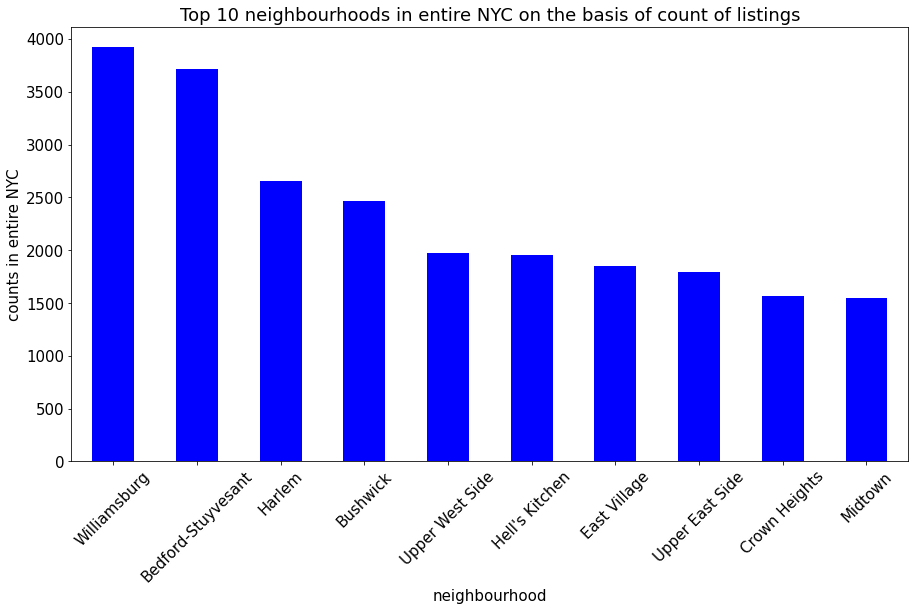

In [25]:
plt.figure(figsize=(15,8))
plt.rcParams['font.size'] = 15
top_10_neigbours= df_airbnb['neighbourhood'].value_counts()[:10] 
top_10_neigbours.plot(kind='bar',color='b', rot = 45)
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top 10 neighbourhoods in entire NYC on the basis of count of listings')
plt.show()

**4.Average Reviews/month received by 10 Top hosts**

In [26]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df_airbnb.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['host_name','reviews_per_month','neighbourhood_group', 'name']]

host_name  reviews_per_month neighbourhood_group  \
42075   Row NYC              58.50           Manhattan   
42076   Row NYC              27.95           Manhattan   
38870    Louann              20.94              Queens   
27287   Nalicia              19.75              Queens   
28651   Nalicia              17.82              Queens   
29628   Nalicia              16.81              Queens   
20403  Danielle              16.22              Queens   
22469  Danielle              16.03              Queens   
36238     Brent              15.78              Queens   
40297  Lakshmee              15.32              Queens   

                                                    name  
42075  Enjoy great views of the City in our Deluxe Room!  
42076           Great Room in the heart of Times Square!  
38870                 Lou's Palace-So much for so little  
27287  JFK Comfort.5 Mins from JFK Private Bedroom & ...  
28651      JFK 2 Comfort 5 Mins from JFK Private Bedroom  
29628      JFK 3 Comfort 5 Mins from JFK Private Bedroom  
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  
22469  Cute Tiny Room Family Home by LGA NO CLEANING FEE  
36238                                 “For Heaven Cakes”  
40297        Studio Apartment 6 minutes from JFK Airport

So, this are the hosts with highest number of reviews, the highest being ROW NYC with 58 reviews/month followed by Louann in the heart of Times Square with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.

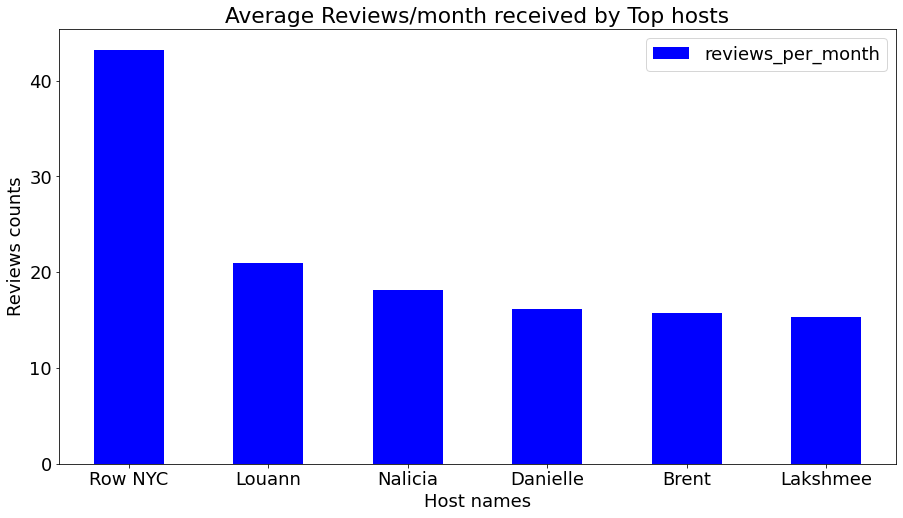

In [27]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 18
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='b',rot = 0)
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Average Reviews/month received by Top hosts')
plt.show()

**5.On an average for how many nights people stayed in each room_types**

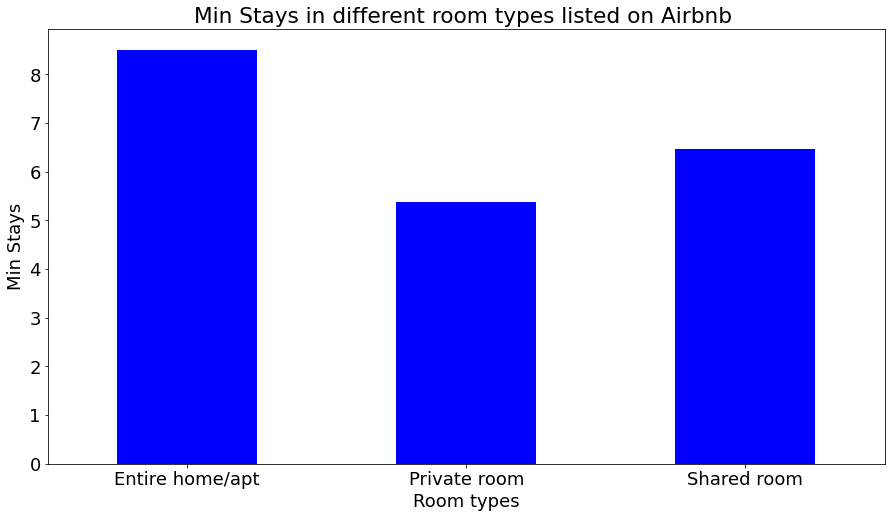

In [28]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] =18
df_airbnb.groupby('room_type')['minimum_nights'].mean().plot(kind='bar',color='b',rot = 0)
plt.title('Min Stays in different room types listed on Airbnb ')
plt.ylabel('Min Stays')
plt.xlabel('Room types')
plt.show()

Looking at these it clearly indicates that people **mostly prefer living in an entire home/apt** on an average of more than 8 nights followed by guests who stayed in shared room where average stay is 6-7 nights.